# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

## Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')
data.info()
#ceiling_height connected to price         
#living_area connected to price
#locality_name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

## Step 2. Data preprocessing

In [2]:
# Categorizing the data by price category
def price_category(row):
    if row['last_price'] < 100000:
        return 'very cheap'
    if 100000 <= row['last_price'] < 1000000:
        return 'cheap'
    if 1000000 <= row['last_price'] < 5000000:
        return 'average'
    if 5000000 <= row['last_price'] < 15000000:
        return 'expensive'
    if row['last_price'] >= 15000000:
        return 'elite'
data['price_category'] = data.apply(price_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,expensive
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,average
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,expensive
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,elite
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,expensive


In [3]:
import numpy as np
data['ceiling_height'] = data.groupby('price_category')['ceiling_height'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)
data['living_area'] = data.groupby('price_category')['living_area'].transform(
   lambda grp: grp.fillna(np.mean(grp))
)

In [4]:
data[['floors_total', 'kitchen_area', 'balcony']] = data[['floors_total', 'kitchen_area', 'balcony']].fillna(value=0)

In [5]:
data[['floors_total', 'living_area']] = data[['floors_total', 'living_area']].astype(int)

## Conclusion

##### The missing values were identified in "ceiling_height" and "living_area" columns. Filling out the gaps just by the mean or median of each column data appears to be inappropriate and may lead to erroneous results. Therefore the apartment prices were divided to 5 price categories (Very cheap, cheap, average, expensive, elite). Price is believed to have a strong correlation with ceiling height and apartment area. Expensive apartments have larger area and higher ceilings and vice versa. The means were calculated for each individual price group and then used to fill out the gaps in these groups. The missing values in 'floors_total', 'kitchen_area', 'balcony' are filled out with 0 (0 means that there is no balcony or kitchen). 

## Step 3. Make calculations and add them to the table

In [8]:
data['price_per_sqm'] = data['last_price'] / data['total_area']

In [9]:
# Floor categorization
def floor(row):
    if row['floor'] == 1:
        return 'first'
    if row['floor'] == row['floors_total']:
        return 'last'
    return 'other'
data['floor_type'] = data.apply(floor, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_category,price_per_sqm,floor_type
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16,51,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,expensive,120370.370370,other
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.669558,11,18,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,average,82920.792079,first
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.830243,5,34,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,expensive,92785.714286,other
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.273556,14,87,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,elite,408176.100629,other
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14,32,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,expensive,100000.000000,other


In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [11]:
data['area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']
data['days_exposition'] = data['days_exposition'].fillna(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_category,price_per_sqm,floor_type,weekday,month,year,area_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51,8,NaN,...,755.0,0.0,expensive,120370.370370,other,3,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.669558,11,18,1,NaN,...,NaN,81.0,average,82920.792079,first,1,12,2018,0.445545,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.830243,5,34,4,NaN,...,574.0,558.0,expensive,92785.714286,other,3,8,2015,0.607143,0.148214
3,0,64900000.0,159.0,2015-07-24,3,3.273556,14,87,9,NaN,...,234.0,424.0,elite,408176.100629,other,4,7,2015,0.547170,0.000000
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32,13,NaN,...,48.0,121.0,expensive,100000.000000,other,1,6,2018,0.320000,0.410000


## Step 4. Conduct exploratory data analysis and follow the instructions below:

## Task 1: Plotting the histograms of area, price, number of rooms and ceiling height 

count    23699.000000
mean        34.315836
std         21.647863
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max        409.000000
Name: living_area, dtype: float64

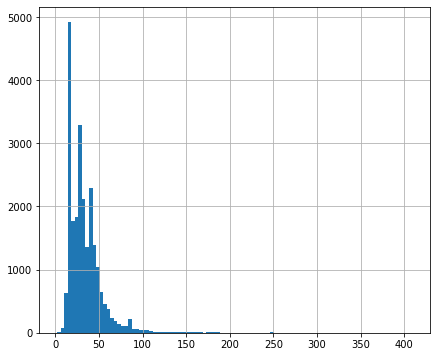

In [12]:
data['living_area'].hist(bins=100, figsize=(7, 6))
data['living_area'].describe()

count       224.000000
mean     771564.861607
std      155065.093832
min      430000.000000
25%      650000.000000
50%      790000.000000
75%      900000.000000
max      999999.000000
Name: last_price, dtype: float64

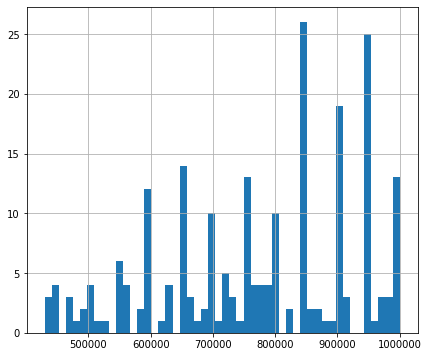

In [13]:
data.query('price_category=="cheap"')['last_price'].hist(bins=50, figsize=(7, 6))
data.query('price_category=="cheap"')['last_price'].describe()

count    1.300200e+04
mean     3.472572e+06
std      9.487949e+05
min      1.000000e+06
25%      2.850000e+06
50%      3.599500e+06
75%      4.200000e+06
max      4.999999e+06
Name: last_price, dtype: float64

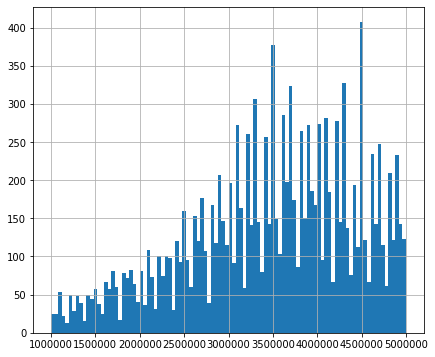

In [14]:
data.query('price_category=="average"')['last_price'].hist(bins=100, figsize=(7, 6))
data.query('price_category=="average"')['last_price'].describe()

count    9.227000e+03
mean     7.604910e+06
std      2.412665e+06
min      5.000000e+06
25%      5.700000e+06
50%      6.800000e+06
75%      8.800000e+06
max      1.500000e+07
Name: last_price, dtype: float64

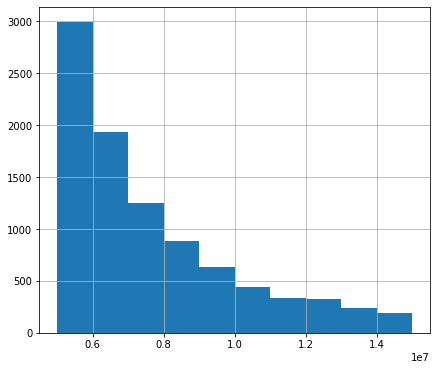

In [15]:
data.query('price_category=="expensive"')['last_price'].hist(figsize=(7,6))
data.query('price_category=="expensive"')['last_price'].describe()

count    1.245000e+03
mean     3.175457e+07
std      3.816116e+07
min      1.500000e+07
25%      1.729900e+07
50%      2.190000e+07
75%      3.087726e+07
max      7.630000e+08
Name: last_price, dtype: float64

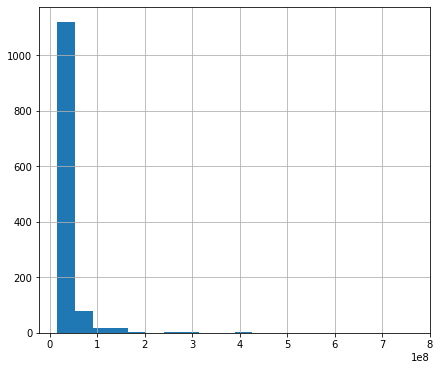

In [16]:
data.query('price_category=="elite"')['last_price'].hist(bins=20,  figsize=(7, 6))
data.query('price_category=="elite"')['last_price'].describe()

count    23699.000000
mean         2.763244
std          0.990214
min          1.000000
25%          2.600000
50%          2.669558
75%          2.830243
max        100.000000
Name: ceiling_height, dtype: float64

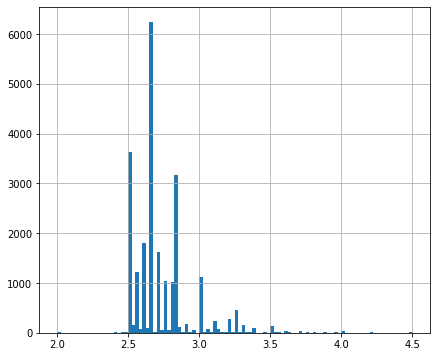

In [17]:
data['ceiling_height'].hist(bins=100,  figsize=(7, 6), range=(2, 4.5))
data['ceiling_height'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

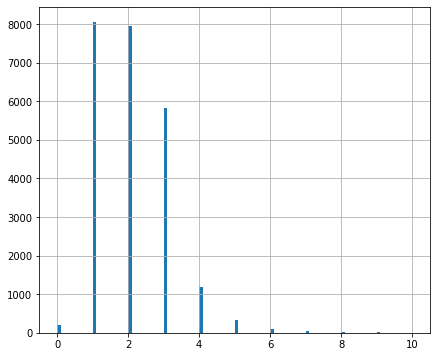

In [18]:
data['rooms'].hist(bins=100,  figsize=(7, 6), range=(0, 10))
data['rooms'].describe()

Task 2: Identifying the date of selling

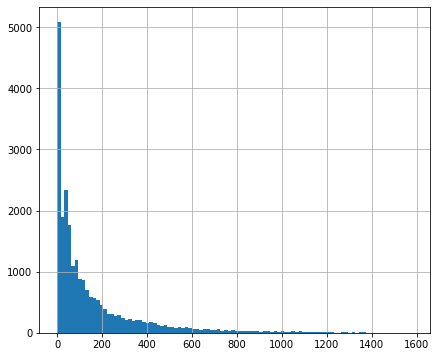

In [19]:
data['days_exposition'].hist(bins=100, figsize=(7, 6))

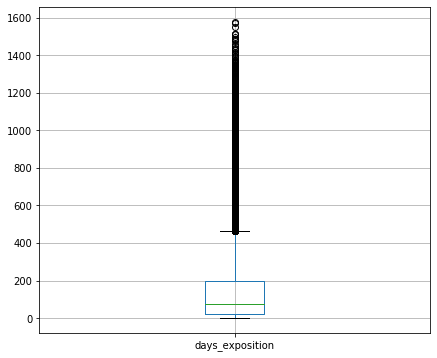

In [20]:
data.boxplot('days_exposition', figsize=(7, 6))

In [21]:
data['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

##### As seen from the boxplot graph values which are more than 500 days are relatively rare. Sales lasting more than this number of days can be considered quite long. The median is closer to the lower whisker, because the values of less than 200 days are more common. The mean time for selling an apartment is 156 days. If the sale lasts less than 74 days (which is the median) then it can be considered very quick.

Task 3: Removing outlying values

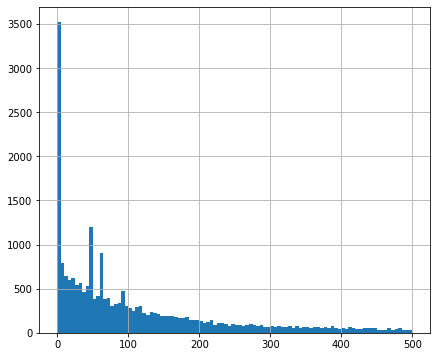

In [22]:
data = data.query('days_exposition <= 500')
data['days_exposition'].hist(bins=100, figsize=(7, 6))

##### The graph shows that the significant amount of sales are made quite fast, surprisingly less than 10 days. The number of sales taking longer time are slightly decreasing as the periods increase. There are two peaks though at 50 and 70 days period. All the values less than 500 days are removed because they are outliers.

Task 4: Correlation

In [23]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
print('Correlation of price and total area: {:.2f}'.format(data['last_price'].corr(data['total_area'])))
print('Correlation of price and number of rooms: {:.2f}'.format(data['last_price'].corr(data['rooms'])))
print('Correlation of price and floor type: {:.2f}'.format(data['last_price'].corr(data['floors_total'])))
print('Correlation of price and proximity to downtown area: {:.2f}'.format(data['last_price'].corr(data['cityCenters_nearest'])))

Correlation of price and total area: 0.64
Correlation of price and number of rooms: 0.36
Correlation of price and floor type: -0.00
Correlation of price and proximity to downtown area: -0.04


##### Prices mostly correlate with the total area and the number of rooms. There is no correlation between floor type and proximity to downtown area. 

Task 5: Top 10 localities

In [25]:
# Identifying top 10 localities
top10_locality = (
    data
    .pivot_table(index='locality_name', values='total_images', aggfunc='count')
    .sort_values(by='total_images', ascending=False)
    .reset_index()
)
top10_locality = top10_locality.loc[0:9]
top10_locality

,locality_name,total_images
0,Saint Peterburg,14504
1,Murino village,522
2,Shushary village,417
3,Vsevolozhsk,367
4,Pushkin,340
5,Kolpino,323
6,Pargolovo village,312
7,Gatchina,283
8,Kudrovo village,266
9,Vyborg,222


In [26]:
# this code calculates the mean prices for the top 10 localities
data['top10_locality'] = (
    data['locality_name']
    .where(data['locality_name'].isin(top10_locality.locality_name), 'Other')
)
(data
   .query('top10_locality != "Other"')
   .pivot_table(index='top10_locality', values='last_price', aggfunc='mean')
   .sort_values(by='last_price', ascending=False)
   .reset_index()
)

,top10_locality,last_price
0,Saint Peterburg,7.857485e+06
1,Pushkin,6.378316e+06
2,Pargolovo village,4.492132e+06
3,Kudrovo village,4.250070e+06
4,Shushary village,4.116588e+06
5,Kolpino,3.955536e+06
6,Vsevolozhsk,3.820542e+06
7,Murino village,3.611373e+06
8,Gatchina,3.511496e+06
9,Vyborg,3.249833e+06


##### As we see from the table the lowest prices are in Vyborg and the highest are in Saint-Petersburg.

Task 6: Downtown border

In [28]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype(int)
downtown_border = (
    data
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
)

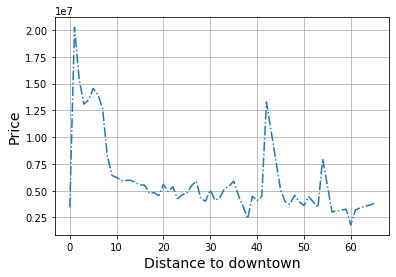

In [29]:
import matplotlib.pyplot as plt
plt.plot(downtown_border, ls='-.')
plt.xlabel('Distance to downtown', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

##### Price drops dramatically at the distance of 3 km. So 3 km is the radius of the downtown area.

In [30]:
print('Correlation of price and total area in downtown: {:.2f}'.format(data.query('cityCenters_nearest_km <= 3')['last_price'].corr(data.query('cityCenters_nearest_km <= 3')['total_area'])))
print('Correlation of price and number of rooms in downtown: {:.2f}'.format(data.query('cityCenters_nearest_km <= 3')['last_price'].corr(data.query('cityCenters_nearest_km <= 3')['rooms'])))
print('Correlation of price and floor type in downtown: {:.2f}'.format(data.query('cityCenters_nearest_km <= 3')['last_price'].corr(data.query('cityCenters_nearest_km <= 3')['floors_total'])))
print('Correlation of price and proximity to downtown area: {:.2f}'.format(data.query('cityCenters_nearest_km <= 3')['last_price'].corr(data.query('cityCenters_nearest_km <= 3')['cityCenters_nearest_km'])))
print('Correlation of price and ad publication date in downtown: {:.2f}'.format(data.query('cityCenters_nearest_km <= 3')['last_price'].corr(data.query('cityCenters_nearest_km <= 3')['year'])))
print('Correlation of price and ceiling height in downtown: {:.2f}'.format(data.query('cityCenters_nearest_km <= 3')['last_price'].corr(data.query('cityCenters_nearest_km <= 3')['ceiling_height'])))

Correlation of price and total area in downtown: 0.55
Correlation of price and number of rooms in downtown: 0.29
Correlation of price and floor type in downtown: -0.03
Correlation of price and proximity to downtown area: 0.24
Correlation of price and ad publication date in downtown: -0.03
Correlation of price and ceiling height in downtown: 0.07


##### The coefficients show some correlation only between the price and area, the price and number of rooms, which is related to area. All of the other parameters appear to have no correlation with the price. Floor type, publication date, ceiling height and proximity do not play a substanstial role in pricing.

### Step 5. Overall conclusion

##### In Saint-Petersburg and its region average apartment area is 30 square m.  The majority of apartments are priced at 1000000 - 5000000 rubles. The second most common price category is 'expensive' which ranges from 5000000-15000000 rubles. Most of the apartments have 2 rooms and a 2,7 m ceiling height. An apartment can be sold within a period of maximum 500 days. The average period is shorter, about 156 days. According to the results, the prices n the whole region only correlate with area. Top 10 most popular locations were identified, Saint-Petersburg city has the highest apartment prices. The downtown border of S-P is calculated to be approximately 3 km. The apartments in these area were studied. There is a correlation between prices and apartment areas, all other parameters do not seem to be relevant.